In [2]:
import pandas as pd
import preprocessing as pp
import utils as utils
import numpy as np
from xgboost.sklearn import XGBClassifier
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [3]:
import random
seed = 100
np.random.seed(seed)
random.seed(seed)

In [4]:
X, y = utils.importar_datos()

### Métricas finales

Se eligió el [Modelo 4](#Modelo-4) en base a los resultados obtenidos mediante `cross_validation`.

In [5]:
pipeline = Pipeline([
    ("preprocessor", pp.PreprocessingOHE()),
    ("model", XGBClassifier(use_label_encoder=False, scale_pos_weight=1, subsample=0.8, colsample_bytree=0.8,
                            objective="binary:logistic", n_estimators=1000, learning_rate=0.01, n_jobs=-1,
                            eval_metric="logloss", min_child_weight=6, max_depth=6, reg_alpha=0.05))
])

AUC_ROC,Accuracy,Precision,Recall,F1 Score
0.892464,0.851240,0.888889,0.695652,0.780488


Matriz de confusión:


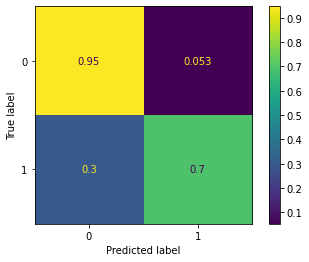

In [6]:
pipeline = utils.entrenar_y_realizar_prediccion_final_con_metricas(X, y, pipeline)

La métrica objetivo AUC-ROC tiene un resultado similar al obtenido por los modelos basados en arboles. Por el momento esto indica que este tipo de modelos obtienen una menor tasa de Falsos Negativos, mejorando todas las metricas que dependen de ello. Sin embargo, la tasa de Falsos Positivos de este modelo es un poco mayor que la obtenida en 2-RandomForest, por lo cual no logra obtener mejores métricas que dicho modelo.

### Predicción HoldOut

In [15]:
utils.predecir_holdout_y_generar_csv(pipeline, 'Predicciones/4-XGBoost-OHE.csv')